<a href="https://colab.research.google.com/github/Ryu4824/code-states/blob/main/Sprint2_Mini_Project_(1%E1%84%8C%E1%85%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint 2 Mini Project**

## Sprint 학습 목표
- 베이지안 정리를 활용하여 확률을 업데이트하는 과정을 이해한다.
- 통계적 개념들을 학습하고, 데이터셋을 통해 확인할 수 있다.
- 가설을 수립하고, 검정하여 통계적으로 유의한 인사이트를 도출할 수 있다.

## Project 문제 정의

### 배경
> 여러분께서는 호텔 숙박업 중개 플랫폼 회사의 데이터 분석 업무 담당자입니다.<br>
주요 타겟 지역은 **포르투갈**이며, 효율적으로 호텔을 중개하고 매출액을 늘리기 위해서는 가설을 세우고 검정하여 추론하는 과정이 필수입니다.<br>
<br>
프로젝트의 주요 과제는, 데이터셋을 바탕으로, 강의 노트에서 배운 통계적 지표를 연습해보고 인사이트를 도출하는 것입니다.
<br>
현재 상황 분석 및 예약 취소율 감소를 위한 다양한 가설을 수립하고 검정하여, 통계적으로 유의미한 비즈니스 인사이트를 도출하는 프로젝트를 진행해보세요.

### 목표

> - 베이지안 정리를 활용하여, 확률을 업데이트하는 과정을 이해한다.
- 데이터셋을 바탕으로, 다양한 통계 이론을 연습하고 학습한다.
- 가설을 수립하고 검정하는 과정을 통해, 통계적으로 유의한지 확인한다.

## **N121 Bayes Theorem**

### 오늘의 목표
- 베이지안 이론을 활용하여, 몬티홀 문제를 설명할 수 있다.
- 주어진 데이터셋을 바탕으로, 베이지안 이론을 활용할 수 있다.

### `Topic 1` : 몬티홀 문제


다음 [영상](https://www.youtube.com/watch?v=UexhMS_F5Qw)에서 등장하는 몬티홀 딜레마 문제를 베이지안 공식을 활용하여 해결해보세요.

- 처음에 1번 문을 선택했다고 가정합니다. 진행자가 남은 두 개의 문 중 염소가 있는 문 하나를 공개한 상태에서 기존에 선택했던 문(1번문)에 자동차가 있을 확률을 구하세요. 

- 처음 선택을 유지하는 것이 유리한지, 아니면 선택을 바꾸는 것이 유리한지 생각해보세요.

```
Hypothesis: 1번 문 뒤에 자동차가 있음
Evidence: 진행자가 염소가 있는 문을 열어줌

우리가 알고자 하는 것: P(H|E) -> 진행자가 염소가 있는 문을 열었을 때, 우리가 먼저 선택했던 문 안에 자동차가 있을 확률
```


#### **1-1. 진행자가 남은 두 개의 문 중 염소가 있는 문 하나를 공개한 상태에서 기존에 선택했던 문에 자동차가 있을 확률을 구하세요.**
- 처음에 1번 문을 선택했다고 가정합니다.

In [ ]:
close_car = 1/3 #자동차가 있을 확률
close_goat = 2/3 #염소가 있을 확률

open_car = 1/2 #오픈 했을때 자동차가 있을 확률
open_goat = 1/2 #오픈 했을때 염소가 있을 확률

notchange = close_car * open_car / ((close_car * open_car) + (close_goat*open_goat))
notchange

0.3333333333333333

#### **1-2. 선택을 바꾸시겠습니까?**
- 처음에 했던 선택을 유지하는 것이 유리할지, 아니면 선택을 바꾸는 것이 유리할지 생각해보세요.

In [ ]:
1 - notchange

0.6666666666666667

### **데이터셋 불러오기 : Hotel 데이터셋**
분석에 앞서, 아래의 데이터셋 설명을 통해 어떤 정보를 가진 데이터셋인지 파악 후 코드를 통해 데이터셋을 불러오세요.

<br>

> **hotel 데이터셋 설명 (Description)** <br>
호텔 숙박 플랫폼에 등록된 예약 정보 데이터
- 이전에 플랫폼을 사용하여 예약한 경험 + 취소 이력이 없는 사람으로 이루어진 데이터셋

- `hotel` : 호텔 종류
- `is_canceled` : 예매 취소 여부
- `lead_time` : 예매한 날짜와 도착 날짜 사이에 경과된 일수
- `arrival_date_year` : 도착 연도
- `arrival_date_month` : 도착 월
- `arrival_date_week_number` : 도착한 주 (e.g. 5주차)
- `arrival_date_day_of_month` : 도착한 날짜(일)
- `stays_in_weekend_nights` : 총 숙박 기간 중 주말 숙박의 개수

- `stays_in_week_nights` : 총 숙박 기간 중 주중 숙박의 개수
- `adults` : 숙박 고객 중 어른의 숫자
- `children` : 숙박 고객 중 아이의 숫자
- `deposit_type` : 보증금 종류
- `days_in_waiting_list` : 고객이 예약을 확정하기 전 대기 리스트에 있던 일수
- `adr` : 일일 평균 객실료 (모든 숙박 거래의 합계를 총 숙박 일수로 나눈 평균 일 요금)
- `arrival_date` : 도착 날짜
- `arrival_day` : 도착 요일
- `reservation_status` : 예약 상태
- `reservation_status_date` : 예약 상태가 변화한 날짜
- `status_changed_day` : 예약 상태가 변화한 요일

In [ ]:
import math
import pandas as pd

In [ ]:
#from google.colab import files 
#uploaded = files.upload()

In [ ]:
hotel = pd.read_csv('/content/hotel (1).csv')
hotel.head()

FileNotFoundError: ignored

### `Topic 2` : 베이지안 정리 적용

#### **2-1. 고객이 리조트 호텔을 예약했을 때, 예약을 취소할 확률은 어떻게 변하나요?**
> Bayesian Theorem의 공식을 대입해보면 아래와 같습니다. <br>
<br>
> $P(cancel|resort) = P(cancel \cap resort) / P(resort) = P(resort|cancel)P(cancel) / P(resort)$
<br>

- 예약을 취소하는 사전 확률($P(cancel)$)은 **이유 불충분의 원리**에 따라 `0.5`로 설정합니다.
- 데이터셋을 바탕으로, 아래의 확률을 도출해보세요.
  - 예매를 취소했는데, Resort Hotel을 예약한 경우 ($P(resort|cancel)$) : `resort_yes_cancel`
  - 예매를 취소하지 않았는데, Resort Hotel을 예약한 경우 ($P(resort|not \; cancel)$) : `resort_no_cancel`
- 상기한 경우들을 바탕으로, 베이지안 정리를 통해 사전 확률을 업데이트하는 함수를 완성해보세요.
   - 다음 `bayesian_hotel` 함수를 완성하여 사후확률을 구하는 것이 어렵다면, warm-up 영상에서 나온 사각형 방식으로 사후확률을 계산해보세요.



In [ ]:
# Resort Hotel을 예약했을 때, 예매를 취소할 확률 = posterior (사후 확률)

def bayesian_hotel(prior, resort_yes_cancel, resort_no_cancel):
  '''
  parameters:
    - prior: 사전 확률 (예약을 취소할 확률)
    - resort_yes_cancel: 예매를 취소했는데 resort hotel을 예약한 경우
    - resort_no_cancel: 예매를 취소하지 않았는데 resort hotel을 예약한 경우
  
  return:
    - posterior: 사후 확률

  '''
  # 이곳에 코드를 작성하세요

  nprior = 1 - prior
  posterior = prior*resort_yes_cancel / ((prior*resort_yes_cancel) + (nprior*resort_no_cancel))
  
  return posterior

#P(resort|cancel)P(cancel)/P(resort)

### **Conclusion**
> * 고객이 리조트 호텔을 예약했을 때, 예약을 취소할 확률은 어떻게 변하는지 설명해주세요.
* 베이지안 정리에 대해 정의해보고 실생활에서 사용되는 예시를 찾아보세요.

In [ ]:
hotel_canceled = hotel[['hotel', 'is_canceled']]
hotel_canceled

In [ ]:
hotel_canceled.isnull().sum()

In [ ]:
prior = 0.5

resort_yes_cancel = hotel[hotel["is_canceled"]==1]["hotel"].value_counts(normalize=True)["Resort Hotel"]
resort_no_cancel = hotel[hotel["is_canceled"]==0]["hotel"].value_counts(normalize=True)["Resort Hotel"]
print(resort_yes_cancel,resort_no_cancel)

In [ ]:
bayesian_hotel(prior, resort_yes_cancel, resort_no_cancel)

In [ ]:
#박희영 풀이

'''
[!] 구해야할 것
예매를 취소했는데, Resort Hotel을 예약한 경우 ( P(resort|cancel) ) : resort_yes_cancel
예매를 취소하지 않았는데, Resort Hotel을 예약한 경우 ( P(resort|notcancel) ) : resort_no_cancel
'''

#리조트를 예약한 사람 중 예약 유지-취소 비율
hotel[hotel["hotel"]=="Resort Hotel"]['is_canceled'].value_counts(normalize=True)

In [ ]:
#호텔을 예약한 사람 중 예약 유지-취소 비율
hotel[hotel["hotel"]=="City Hotel"]['is_canceled'].value_counts(normalize=True)

In [ ]:
#함수에 들어갈 변수 지정
resort_cancel = hotel[hotel["hotel"]=="Resort Hotel"]['is_canceled'].value_counts(normalize=True)[1]
city_cancel = hotel[hotel["hotel"]=="City Hotel"]['is_canceled'].value_counts(normalize=True)[1]

print(resort_cancel, city_cancel)

In [ ]:
def hohotel(prior, resort_cancel, city_cancel):
  resort_yes_cancel = prior*resort_cancel / ( prior*resort_cancel + prior*city_cancel )
  resort_no_cancel =  (1 - prior) * (1 - resort_cancel) / ( (1 - prior)*(1 - resort_cancel) + (1 - prior)*(1 - city_cancel) )
  print("resort_yes_cancel:", resort_yes_cancel, ", resort_no_cancel:", resort_no_cancel)

hohotel(prior, resort_cancel, city_cancel)

#### **Optional. 예약한 호텔 종류 외에, 다양한 데이터를 바탕으로 위에서 구한 확률을 업데이트 해보세요.**
- 다양한 column의 데이터를 활용하여, 위에서 구한 확률을 사전확률로 설정하고 베이지안 정리를 통해 업데이트 해보세요.

## **N122 CLT**

### 오늘의 목표
- 큰 수의 법칙, 중심극한정리, 부트스트래핑, 신뢰구간에 대해 설명할 수 있다.
- 주어진 데이터셋에서, 통계적 개념을 직접 적용하고 시각화를 통해 확인할 수 있다.

### `Topic 1` : 통계적 개념 정리하기
> 큰 수의 법칙, 중심극한정리, 부트스트래핑, 신뢰구간에 대해 요약하여 정리해보세요.

In [ ]:
# 큰 수의 법칙 : 동일한 확률 분포에서 무작위로 추출된 표본의 평균이 표본의 크기가 커질수록 전체 모집단의 평균에 가까워진다는 이론
# 중심극한정리 : 동일한 분포에서 무작위로 추출된 표본의 평균이 표본의 크기가 커질수록 정규분포를 따른다는 이론
# 부트스트래핑 : 표본에서 샘플을 반복적으로 추출하고, 이를 통해 모집단의 특성을 추정하는 방법
# 신뢰구간 : 표본에서 추출된 통계량(예: 평균)이 포함될 것으로 예상되는 구간을 나타내는 것

### `Topic 2` : 통계적 개념 적용하기
> `hotel` 데이터셋의 column들을 활용하여, N122의 통계적 개념 `(큰 수의 법칙, 중심극한정리, 신뢰 구간)`을 적용하고 시각화해보세요.
- `hotel` 데이터셋 내 다양한 column의 분포를 확인해보세요.
- `N122` 강의 노트의 코드를 참고하여, 데이터셋의 column에서 확인할 수 있는 통계적 개념을 시각화를 통해 나타내보세요.


#### **2-1. 큰 수의 법칙 (Law of Large Numbers)**
- 무작위 column을 한 가지 선택하여, 분포를 확인하고 큰 수의 법칙을 시각화 해보세요.
  - sample의 갯수가 3, 10, 30 일 때의 평균값이 어떻게 변화하는지 확인해보세요.
  - 어떤 경우에, 전체 데이터의 평균값과 가장 유사한 평균값을 가지게 되나요?

In [ ]:
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

#hotel_adr = hotel['adr']
#hotel_adr.mean()
#sample_3_mean = hotel_adr.sample(3,random_state = 2, replace = True).mean()
#sample_10_mean = hotel_adr.sample(10,random_state = 2, replace = True).mean()
#sample_30_mean = hotel_adr.sample(30, random_state = 2, replace = True).mean()
#show = pd.DataFrame({'size':[3, 10, 30, '모평균'], 'mean':[int(sample1), int(sample2), int(sample3), hotel_adr.mean()]}).reset_index()
#show = show.drop('index', axis = 1)
#print(show)

#결과를 확인해보니 표본 크기가 10개인 경우가 30개인 경우보다 모평균에 더 가까웠다。 
#그 이유는 랜덤하게 뽑혔기 때문이다。 따라서 표본 크기가 3개 10개 30개로 각각 Bootstrapping을 돌려보았다。 
#그 결과 표본의 크기가 클수록 표본평균의 평균이 모평균에 가까워졌다。


In [ ]:
hotel_adr = hotel['adr']

np.random.seed(38)

s1 = []
s2 = []
s3 = []

for i in range(len(hotel_adr)):
    sample = np.random.choice(hotel_adr, size=3, replace=True)
    s1.append(sample.mean())

    sample2 = np.random.choice(hotel_adr, size=10, replace=True)
    s2.append(sample2.mean())

    sample3 = np.random.choice(hotel_adr, size=30, replace=True)
    s3.append(sample3.mean())

In [ ]:
s1 = np.array(s1)
s2 = np.array(s2)
s3 = np.array(s3)

s1_mean = s1.mean()
s2_mean = s2.mean()
s3_mean = s3.mean()


print(hotel_adr.mean(), s1_mean, s2_mean, s3_mean)

In [ ]:
show = pd.DataFrame({'size':[3, 10, 30, '모평균'], 'mean':[s1_mean, s2_mean, s3_mean, hotel_adr.mean()]}).reset_index()
show = show.drop('index', axis = 1)
show

In [ ]:
hotel_adr = hotel['adr']
random.seed(10)
a = []
for _ in range(10000):
    sample = np.random.choice(hotel_adr, 30, replace=True)
    a.append(sample.mean())

lower, upper = round(np.percentile(a, 2.5),5), round(np.percentile(a, 97.5),5)

sns.kdeplot(a);
plt.axvline(np.mean(a), c='green', label='Mean')


#### **2-2. 중심극한정리 (Central Limit Theorem)**
- 무작위 column 2개를 선택하여, 분포를 확인하고 부트스트랩을 활용하여 중심극한정리를 시각화 해보세요.
  - 선택한 column을 모집단이라고 가정한 후, 부트스트랩을 활용하여 표본 평균 분포의 모양을 확인해보세요.
  - 부트스트랩 횟수는 10000회로 지정하세요.
  - 다양한 모양의 분포를 갖는 column들로 표본 평균의 분포를 시각화 해보시는 것을 추천드립니다.

In [ ]:
import matplotlib.pyplot as plt

hotel_lead = hotel['lead_time']

s4 = []

for i in range(len(hotel_lead)):
    sample = np.random.choice(hotel_lead, size=10, replace=True)
    s4.append(sample.mean())

plt.figure(figsize=(8,5)) 
sns.kdeplot(s4)
plt.axvline(np.mean(s4), color='green', label = 'Mean')

#### **2-3. 신뢰구간 (Confidence Interval)**
- 2-2. 중심극한정리에서 사용한 column 중 하나를 골라, 표본 평균의 분포를 그리고 신뢰 구간을 표시해보세요.
  - 신뢰 수준 90%, 95%, 99%를 갖는 신뢰구간을 그려보고 구간의 크기가 어떻게 변하는지 확인해보세요.
  - 신뢰구간이 넓어지거나 좁아졌을 때의 장단점에 대해 생각해보세요. (e.g. 어떤 경우에는 신뢰구간을 넓게 설정하는 것이 좋을까요?)

In [ ]:
hotel_adr = hotel['adr']
random.seed(10)
a = []
for _ in range(10000):
    sample = np.random.choice(hotel_adr, 30, replace=True)
    a.append(sample.mean())

lower95, upper95 = round(np.percentile(a, 2.5),5), round(np.percentile(a, 97.5),5)
lower90, upper90 = round(np.percentile(a, 5),5), round(np.percentile(a, 95),5)
lower99, upper99 = round(np.percentile(a, 0.5),5), round(np.percentile(a, 99.5),5)

plt.figure(figsize=(8,5))
sns.kdeplot(a);
plt.axvline(lower95, c='red', label='95% Confidence Interval')
plt.axvline(lower99, c='blue', label='99% Confidence Interval')
plt.axvline(lower90, c='yellow', label='90% Confidence Interval')
plt.axvline(upper95, c='red')
plt.axvline(upper99, c='blue')
plt.axvline(upper90, c='yellow')
plt.axvline(np.mean(a), c='green', label='Mean')
plt.legend();

In [ ]:
plt.figure(figsize=(8,5)) 
sns.kdeplot(s4)
plt.axvline(np.mean(s4), color='green', label = 'Mean')

# 신뢰구간
lower, upper = np.percentile(s4, 5), np.percentile(s1, 95)
print(round(lower, 4), round(upper, 4))
plt.axvline(lower, color='red', label = '90% Confidence Interval')
plt.axvline(upper, color='red')
lower, upper = np.percentile(s4, 2.5), np.percentile(s1, 97.5)
print(round(lower, 4), round(upper, 4))
plt.axvline(lower, color='y', label = '95% Confidence Interval')
plt.axvline(upper, color='y')
lower, upper = np.percentile(s4, 0.5), np.percentile(s1, 99.5)
print(round(lower, 4), round(upper, 4))
plt.axvline(lower, color='b', label = '99% Confidence Interval')
plt.axvline(upper, color='b')
plt.legend()

### **Conclusion**
> * 위의 코드를 실행한 결과를 통해 배운 오늘 배운 내용에 대해 요약해서 정리해보세요.
  - 큰 수의 법칙 (Law of Large Numbers)
  - 중심극한정리 (Central Limit Theorem)
  - 부트스트래핑 (Bootstraping)
  - 신뢰구간 (Confidence Interval)

In [ ]:
# 큰 수의 법칙 (Law of Large Numbers) : 샘플 사이즈 多 -> 샘플의 통계치가 모집단의 모수에 가까워짐.
# 중심극한정리 (Central Limit Theorem) : 모집단의 분포 無 -> But, 임의의 분포에서 추출된 표본들의 분포는 정규분포를 이룸.
# 부트스트래핑 (Bootstraping) : 중복추출 許 -> 원하는 개수 데이터 추출.
# 신뢰구간 (Confidence Interval) : 특정 값 예측 X -> 모수를 포함하고 있을 구간을 말함.

## **N123 Hypothesis Test**

### 오늘의 목표
- 주어진 상황에 맞게 귀무가설, 대립가설, 1종 오류, 2종 오류를 정의내릴 수 있다.
- 가설 검정을 통해 주어진 가설을 통계적으로 검정할 수 있다.

### `Topic 1`: 귀무가설, 대립가설, 1종 오류, 2종 오류
> 귀무가설과 대립가설을 세우고, 가설에 따른 1종 오류와 2종 오류를 정리해보세요. <br>

- 취소된 예약과 취소되지 않은 예약의 평균 `adr`이 다른지를 판단하고자 합니다.
  - `adr` : 일일 평균 객실료 (모든 숙박 거래의 합계를 총 숙박 일수로 나눈 평균 일 요금)
- 이 때, $H_0$, $H_1$, $Type\ 1\ Error$, $Type\ 2\ Error$를 각각 구하세요.

  - $H_0$ :(취소된 예약평균 = 최소되지않은 예약평균)
  - $H_1$ :(취소된 예약평균 != 최소되지않은 예약평균)
  - $Type\ 1\ Error$ : H0 True 일 때 취소된 예약평균 != 최소되지않은 예약평균
  - $Type\ 2\ Error$ : H0 False 일 때 취소된 예약평균 = 최소되지않은 예약평균

### `Topic 2` : 가설 검정
`Topic 1`에서 세운 귀무가설과 대립가설을 바탕으로, 통계적 유의성을 검정해보세요.<br>
- `t-test`를 만족할 수 있는 조건들을 찾아보고, 각각의 조건들을 충족하는지 아래 과정의 **해설 Tip)**을 통해 확인해보세요.
- 그 후, Two-sample T-Test를 시행해보세요.

#### **2-1. 독립성 검정**
- 표본들이 독립성을 갖는지 확인해봅시다.
- 독립변수에 따른 종속변수가 짝을 이루고 있지 않고 별도의 그룹으로 이루어져야 합니다.
  - e.g. 신약 투약군 A : 미투약군 B
  - `데이터셋 불러오기`의 설명을 살펴보세요!

💡 **해설 Tip)** <br>
> `hotel` 데이터셋은 **이전에 플랫폼을 사용하여 예약한 경험 + 취소 이력이 없는 사람**으로 이루어졌기 때문에, 독립성을 만족합니다.

#### **2-2. 정규성 검정**
- `t-test`를 사용하기 위해서는, 확률 분포가 정규 분포를 따르는지 확인하는 것이 중요합니다 (독립변수에 따른 종속변수가 정규분포를 만족하는지 확인해야 합니다)
  - $H_0$ : 정규성을 만족한다.
  - $H_1$ : 정규성을 만족하지 않는다.

💡 **해설 Tip)** <br>
- 일반적으로 sample size가 30 이상인 경우, 중심극한정리에 의해 표본 평균 분포가 정규분포를 따른다고 가정합니다.

- 그 외 정규성을 검정하는 방법인 `Shaprio-Wilks test`, `Kolmogorove-Smirnov test`에 대해 알아보세요.
  - `scipy`
 공식 문서 : [Shapiro–Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), [Kolmogorove-Smirnov test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)



#### **2-3. 등분산 검정**
- 등분산은 독립적인 sample 들의 분포가 비교 가능하고 유사하다는 것을 의미합니다.
  - 등분산 : 2개의 모집단에서 추출된 각 sample의 분산이 같다
- 등분산 검정 또한 `t-test` 사용하기 앞서 확인해봐야 하는 요소입니다.
  - $H_0$ : 등분산이다.
  - $H_1$ : 등분산이 아니다. <br>

<img src="https://i.imgur.com/yfWCtmy.png">

- `Levene's test`, `Bartlett's test`에 대해 알아보세요.
  - `scipy` 공식 문서 : [Levene's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html), [Bartlett's test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)


💡 **해설 Tip)** <br>
> `Levene's test`를 사용하여 등분산성을 확인해봅시다.
- 아래의 코드에 따라 `p-value < 0.05`이기 때문에, 등분산성을 만족하지 않습니다.


In [ ]:
import math
import pandas as pd
import random
import numpy as np
from scipy import stats
from scipy.stats import bartlett

In [ ]:
# 예약 취소 여부
cancel_cond = (hotel["is_canceled"]==1)
# 취소한 예약들의 adr
cancel_adr = hotel[cancel_cond==True]["adr"]
# 취소하지 않은 예약들의 adr
no_cancel_adr = hotel[cancel_cond==False]["adr"]

# Levene's test
stats.levene(cancel_adr, no_cancel_adr)

#### **2-4. Two-Sample T-test**
- 위에서 진행한 검정들을 바탕으로, 두 샘플의 평균값을 비교하는 검정입니다.
  - $H_0$ : $\mu_{cancel} = \mu_{no\ cancel}$
  - $H_1$ : $\mu_{cancel} ≠ \mu_{no\ cancel}$
- `ttest_ind (독립 표본 t-test)`에 대해 알아보세요.
  - `scipy` 공식 문서 : [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
  - 공식 문서의 `parameter`들이 의미하는 것에 주의해서 살펴보세요.
    - 등분산성에 대한 파라미터가 무엇인지 확인해보고, 이를 어떻게 설정하면 좋을지 생각해보세요.
- 가설 검정 결과로 나온 p-value를 통해 우리는 어떤 인사이트를 얻을 수 있을지 논의해보세요.

In [ ]:
# stats.ttest_ind(cancel_adr,no_cancel_adr,equal_var=True,alternative='greater')

In [ ]:
# stats.ttest_ind(no_cancel_adr, cancel_adr, equal_var=False, alternative='less')
# no_cancel이 더 작다

In [ ]:
stats.ttest_ind(cancel_adr, no_cancel_adr, equal_var=False)
# 결론 : 두 값이 다르다
# 따라서 귀무가설 기각, 대립가설 채택택

### **Conclusion**
> 위에서 설정한 귀무가설과 대립가설을 바탕으로, 가설 검정한 결과를 통해 얻을 수 있는 결론들은 무엇인지 설명해주세요.


- 귀무가설과 대립가설을 어떤 기준으로 설정하셨나요? 두 평균값이 같은 것을 귀무가설, 다른 것을 대립가설로 설정
- 표본이 독립성, 정규성, 등분산성을 만족하고 있나요? 그렇게 생각한 이유는 무엇인가요? 독립성 충족 / 정규성 충족(중심극한정리) / 이분산
- Two-Sample T-test를 수행했을 때 예약 취소 고객과 그렇지 않은 고객의 특징에 차이가 있었나요? 어떻게 확인할 수 있었나요? 



귀무가설과 대립가설을 어떤 기준으로 설정하셨나요?
- 비지니스 모델의 시각화를 쉽게 가능한 


##### **Optional. `adr` 컬럼 대신 다른 컬럼들로도 위의 과정을 통해 가설을 수립하고 통계적으로 검정해보세요.**

## **N124 AB Test**

### 오늘의 목표
- 주어진 데이터셋을 바탕으로, 귀무가설과 대립가설을 수립할 수 있다.
- 직접 AB 테스트를 진행하여, 수립한 가설을 검정할 수 있다.

### AB Test 시나리오
> 예약 취소율을 감소시키기 위해, 랜딩 페이지의 `예약 취소` 버튼 위치를 변경하는 **AB Test**를 2주 동안 진행했습니다. <br>
변경 내용은, 원래 `상단`에 위치하던 `예약 취소` 버튼을 `하단`으로 옮겨 랜딩페이지를 구성하는 것입니다. <br>
이러한 변경 사항이 실제로 예약 취소율을 감소시키는지 통계적으로 확인해봅시다.

### 데이터셋 불러오기 : `ab_hotel` 데이터셋
분석에 앞서, 아래의 데이터셋 설명을 통해 어떤 정보를 가진 데이터셋인지 파악 후 코드를 통해 데이터셋을 불러옵니다.
<br>

> **ab_hotel 데이터셋 설명 (Description)** <br>
랜딩 페이지의 예약 취소 버튼 위치 변경에 따른 예매 취소 데이터

- `userid` : 고객 id
- `button` : 예매 취소 버튼 위치
  - `top` : 상단에 위치 (대조군)
  - `bottom` : 하단에 위치 (실험군)
- `is_canceled` : 예약 취소 여부
  - `True`: 예약 취소
  - `False`: 예약 취소 X

### `Topic 1` : 데이터 파악
> AB 테스트 결과를 분석하기 전, EDA를 통해 데이터를 확인해보세요.

#### **1-1. Sample Size 확인**

- AB Test 진행시 최소로 확보해야 하는 Sample Size를 계산해주는 툴인 [**옵티마이즐리**](https://www.optimizely.com/sample-size-calculator/?effect=20&significance=95)를 통해, 테스트 시작 전 어느 정도의 데이터가 필요한지 파악해보세요.
  - 옵티마이즐리 링크에서의 Baseline Conversion Rate에 대한 설명을 바탕으로, `Baseline Conversion Rate`를 직접 구하세요.
  - 위에서 구한 `Baseline Conversion Rate`와, `20%의 MDE`를 바탕으로, 필요한 `Sample Size`를 구해보세요.


#### **1-2. 순 방문자수 확인**
- 순 방문자(unique visitor)란 해당 기간 동안 서비스에 1회 이상 방문한 중복되지 않은 방문자를 말하며, 고유한 ID값에 의해 구분됩니다.
  - AB Test 데이터를 분석할 때에는 중복되는 방문자를 삭제해야 정확한 결과를 도출할 수 있습니다.

#### **1-3. 진행 기간**
- AB Test 진행 기간은 매일 수집되는 데이터 수에 따라 다를 수 있겠지만 30일을 넘기지 않는 것을 추천합니다.
- 주어진 데이터셋은 **2주(14일)** 동안 user를 대상으로 AB Test를 진행했으므로, 적절한 실험 기간이라고 할 수 있습니다.

#### **1-4. 샘플에서의 결과 확인**
- `전체 유저`, `대조군`, `실험군`의 취소율을 각각 구해보고, `대조군과 실험군의 취소율 차이`를 비교해보세요.
- 이는 샘플에서의 결과이기 때문에, 궁극적으로 알고자 하는 **모집단에서의 결과는 가설 검정을 통해 추론**할 수 있습니다.

#### **1-5. 대조군과 실험군 명수 비교**
- 대조군과 실험군의 비율을 확인해보세요.
- 일반적인 AB Test 에서 대조군과 실험군의 비율을 비슷하게 맞추는 이유가 무엇인지 함께 생각해보세요.

### `Topic 2` : 가설 설정
> 가설 검정을 위한 귀무가설과 대립가설을 각각 세워보세요

  - 귀무가설 ($H_0$) : 
  - 대립가설 ($H_1$) : 

### `Topic 3` : 가설 검정 (`z-test`)
- `Topic 2` 에서 세운 귀무가설과 대립가설을 바탕으로, 통계적 유의성을 검정해보세요.

- `z-test`를 만족할 수 있는 조건들을 찾아보고, 각각의 조건들을 충족하는지 확인해보세요.

#### **3-1. 독립성 검정**
- 표본들이 독립성을 갖는지 확인해보세요.
- `1-2. 순 방문자수 확인`의 결과를 참고하세요.

💡 **해설 Tip)** <br>
> `userid` column을 통해, 중복된 유저가 없다는 것을 확인했습니다. <br>
> 이를 통해, 데이터가 서로 독립적이라는 것을 알 수 있습니다.

#### **3-2. 정규성 검정**
- `z-test`를 활용하기 위해서는, 샘플의 확률분포가 정규분포를 따라야 합니다.
- `이항분포`의 경우, 정규분포를 따르는지 여부를 `reference pdf 파일의 30 page`를 통해 확인하세요. 
  - [이항분포 reference](https://viewpds.jihak.co.kr/tsoldb/%EA%B5%90%EA%B3%BC%EC%84%9C%EB%B3%84/%EA%B3%A0_%EC%A0%81%EB%B6%84%EA%B3%BC%20%ED%86%B5%EA%B3%84(%EC%9D%B4%EA%B0%95%EC%84%AD)/4-1/%EC%A7%80%ED%95%99_%EC%A0%81%EB%B6%84%EA%B3%BC%20%ED%86%B5%EA%B3%84_%EA%B3%A0_%EC%9D%B4_4_1_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC_%EA%B5%90%EA%B3%BC%EC%84%9C%20%EB%B3%B8%EB%AC%B8.pdf)
- 아래의 코드를 실행하여, 이항분포가 어떤 모양을 갖는지 살펴보세요.


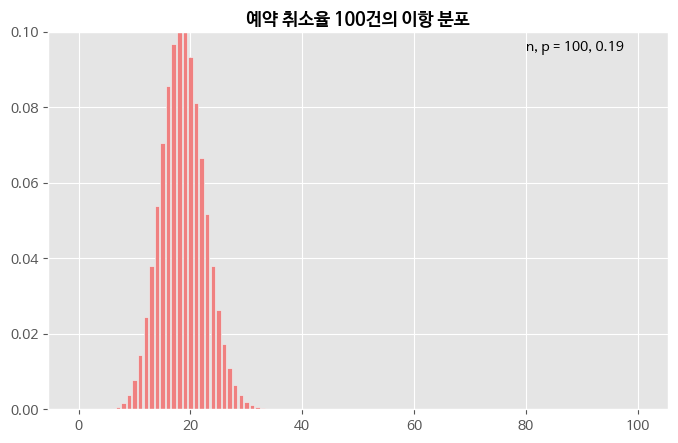

In [ ]:
# 확률변수 X가 이항분포 B(n, p)를 따를 때, n이 충분히 크다면 X는 정규분포 N(np, npq)를 따른다 (단, q=1-p)
from math import factorial

# Probability density of the binomial distribution
# p의 확률을 갖는 n회의 시행에서 k번 성공할 확률을 반환하는 bin_dist 함수 생성
def bin_dist(k, n, p):
    nck = factorial(n) / (factorial(k) * factorial(n - k))
    pd = nck * p**k * (1-p)**(n-k)
    return pd

x = np.arange(101)

# 100회 시행했을 때, 1이 나올 확률 
# (e.g. 앞면이 나올 확률이 ab_hotel.is_canceled.mean()인 동전을 100번 던졌을 때, 앞면이 나올 확률)
pd1 = np.array([bin_dist(k, (101-1), ab_hotel.is_canceled.mean()) for k in range(101)])
# y축 범위 지정
plt.ylim(0, 0.1)

# 그래프상의 x, y위치에 문자열 나타내는 plt.text
plt.text(80, 0.095, f'n, p = {101-1}, {round(ab_hotel.is_canceled.mean(), 2)}')
plt.bar(x, pd1, color='lightcoral')
plt.title("예약 취소율 100건의 이항 분포", fontsize=13, fontweight="bold")
plt.show()

#### **3-3. `z-test`를 사용할 수 있는 조건**
1. 모집단의 **표준 편차**를 아는가? 
  - `모집단의 표준 편차를 아는 경우` : **z-test 사용 가능**합니다.
  - `모집단의 표준편차를 알 수 없지만 표본 크기가 30보다 큰 경우` : **분포가 정규분포에 가깝기 때문에 z-test를 사용 가능**합니다.
2. 데이터는 **서로 독립적**이어야 합니다. (독립성)
3. 데이터의 분포가 **정규 분포의 형태**를 가져야 합니다. (정규성)
4. **Sample Size는 같은 크기**여야 합니다.
5. 각각의 **데이터는 모집단에서 같은 확률로 랜덤하게 선택**되어야 합니다.
  - [z-test를 사용할 수 있는 조건 reference](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/z-test/)
  - [z-test와 t-test의 차이 reference](https://towardsdatascience.com/introduction-tfrom-the-central-limit-theorem-to-the-z-and-t-distributions-66513defb175) <br>
  <img src="https://i.imgur.com/TdU50LX.png" width=600>
- 이항분포의 경우 일반적으로, $n * p$와 $n * (1 - p)$가 5보다 클 때, `Binomial test` 대신 `Z-test`를 시행합니다.
  - [reference 페이지의 하단 부분을 살펴보세요](https://www.spss-tutorials.com/binomial-test/)

#### **3-4. `z-test`**
- `z-test`를 활용하여, 가설을 검정해봅시다.
- statsmodel 공식 문서 : [statsmodels.stats.proportion.proportions_ztest](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html)
  - 공식 문서의 `parameter`들이 의미하는 것에 주의해서 살펴보세요.


#### **3-5. 결론**
- `z-test`를 통해 나온 `p-value`를 토대로, 가설을 검정한 결과를 통계적으로 해석하세요.

## **발표 내용**

- N123에서 설정한 귀무가설과 대립가설을 바탕으로, 가설 검정한 결과를 통해 얻을 수 있는 결론들은 무엇인지 설명해주세요.
  - 예약 취소 고객과 그렇지 않은 고객의 특징에 차이가 있는지에 대한 인사이트를 도출해보세요.
- N124에서 세운 귀무가설과 대립가설을 정리하고, 가설 검정 결과를 설명해주세요.
  - 예약 취소 버튼의 위치 변경에 따라 취소율의 변화가 있는지에 대해 설명해주세요.